# Unconstrained Optimization: Life-cycle model

In [199]:
# Example code for 2020 Computational Economics course at UZH
# code example by: Kenneth Judd, Philipp Mueller

 We consider the unconstrained discrete-time life-cycle optimization problem. The 
 agent maximizes the present value of her life-time utility $u(c)$ w.r.t. 
 her consumption $c$. As the no ponzi scheme condition
 cannot be enforced directly, a bequest function W(c_t) is added to the
 objective function.

\begin{align}
 \max_{c, l, a} &\sum_{t=0}^T \beta ^t u(c_t) + W(c_t) \\\text{with } 
 &c_t =  (1+r) S_t + w_t - S_{t+1} \\
 &S_0 = 1
\end{align}

We choose log utility and a quadratic bequest function.
 

In [200]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time
%matplotlib inline

## Basic problem parameters

In [201]:
T = 40            
T_retirement = 30  # Age of retirement

r = 0.1           # risk-free rate
R = 1 + r
beta = 0.96       # subjective discount-factor

S0 = 1            # initial capital


wage = np.maximum(1.5,(1/2 + np.arange(1,T) *(1 - np.arange(1,T)/T))) / 16
wage[T_retirement:] = 0

In [202]:
def utility_bequest(savings):
    consumption = (1+r) * np.hstack((S0, savings[:-1])) + wage - savings
    return np.log(consumption) - (10000*savings[-1]**2)

In [203]:
def objective(savings):
    return -np.sum(beta**np.arange(0,T-1) * utility_bequest(savings))

In [ ]:
%%time
# Define the start point. It is always advisable to use a feasible
# start-point. In this case, we choose that the agent consumes a constant
# portion of her initial wealth.
x_0 = np.linspace(1, 0, T-1)

# NOTE: We start with Nelder-Mead to arrive at an approximate solution
#       and take the approximate solution as starting point for the
#       BFGS algorithm.

solution = minimize(objective, x_0, method = "Nelder-Mead", tol = 1e-6, options={"disp":False, "maxiter": 1E5})

# set solution as new starting point
x_0 = solution.x 

# run minimization with BFGS algorithm
solution = minimize(objective, x_0, method = "BFGS", tol = 1e-6, options={"disp":False, "maxiter": 1E5})
print("success: " + str(solution.success) +",  First-order opt:", np.linalg.norm(solution.jac), "f_evals:", solution.nfev, ", jac_evals:", jac_evals)

## Visualize results

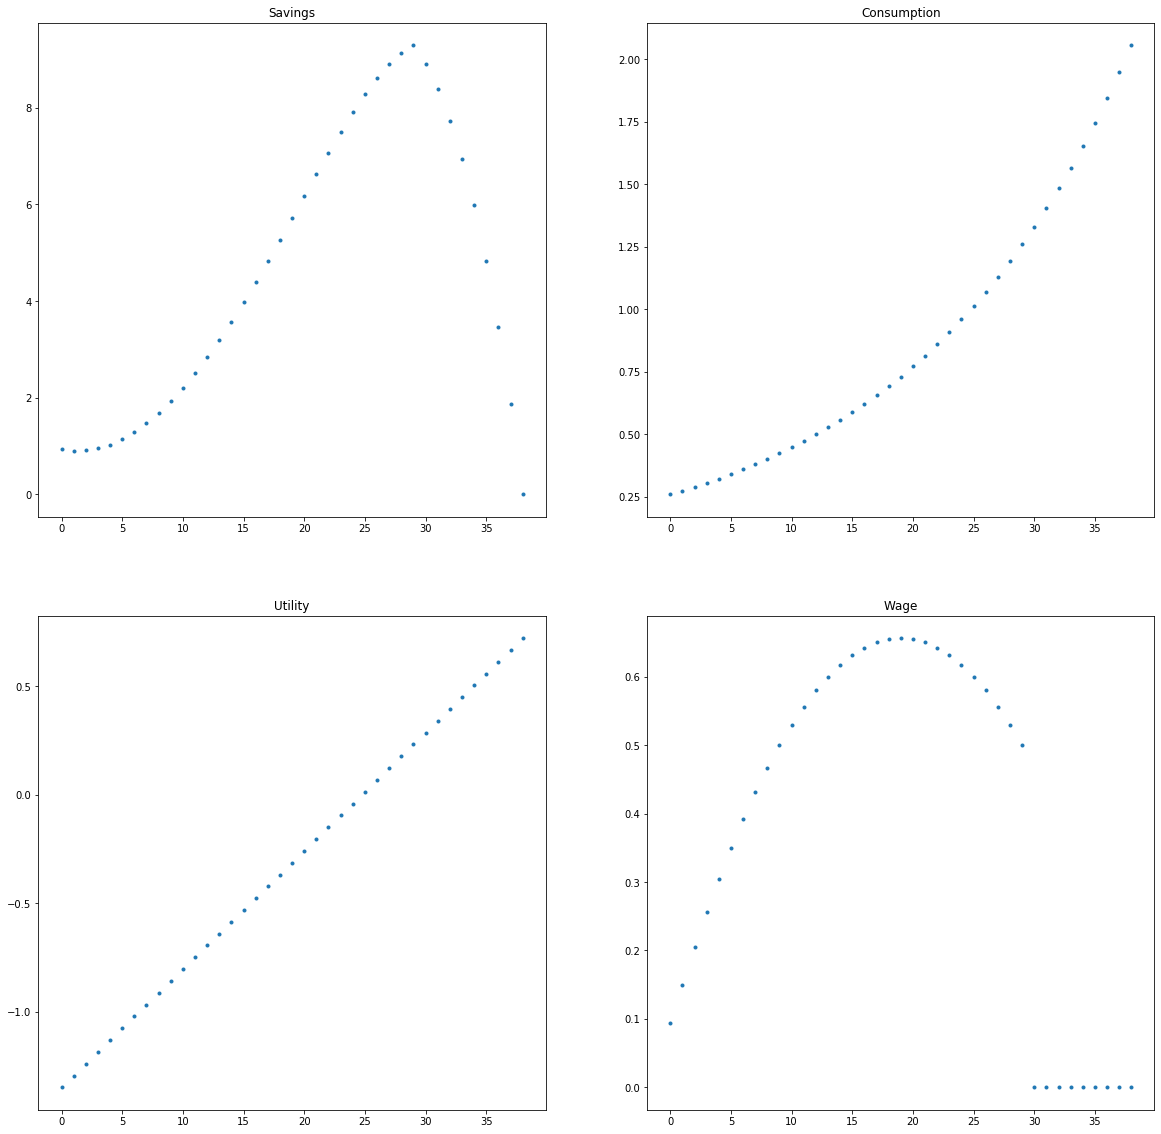

In [208]:
sol = solution.x

fig = plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
plt.plot(sol, ".")
plt.title('Savings')

plt.subplot(2, 2, 2)
plt.plot((1+r) * np.hstack((S0, sol[:-1])) + wage - sol, ".")
plt.title('Consumption')

plt.subplot(2, 2, 3)
plt.plot(utility_bequest(sol), ".")
plt.title('Utility')

plt.subplot(2, 2, 4)
plt.plot(wage, ".")
plt.title('Wage')

plt.show()